<h2>This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.<h2>
<h3>1.Are Males, females or trans (which gender is) more likely to seek mental health treatment?<h3>
<h3>2.Family history cause participants to seek mental treatment?<h3>
<h3>3.Can work interferences cause participants to seek mental treatment?<h3>
<h3>4.How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?<h3>
<h3>5.What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?<h3>


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

survey = pd.read_csv('survey.csv')

In [2]:
survey.shape

(1259, 27)

In [3]:
survey.head() 

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
survey.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
survey.isnull().sum().max()

1095

In [6]:
survey = survey.drop(['comments'], axis= 1)
survey = survey.drop(['state'], axis= 1)
survey = survey.drop(['Timestamp'], axis= 1)
survey.isnull().sum().max()

264

In [7]:
survey.dtypes

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [8]:
survey.Age.describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

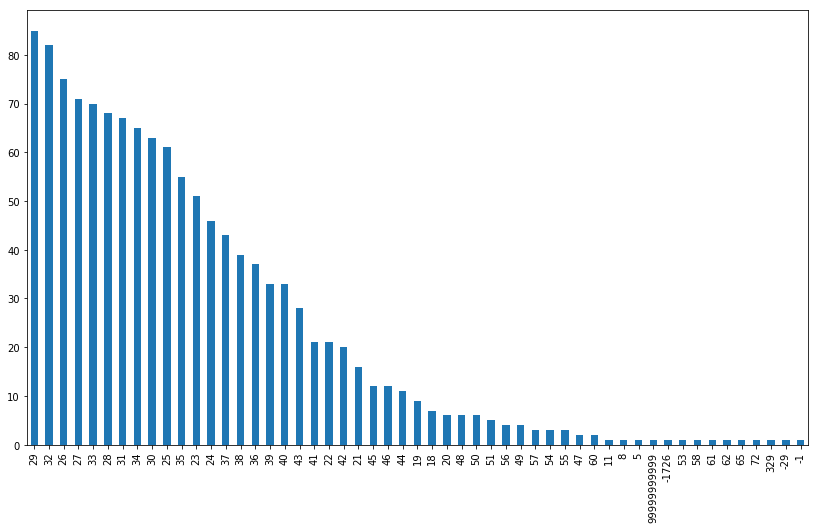

In [9]:
survey['Age'].value_counts().plot(kind='bar', figsize=(14,8));

In [10]:
survey.query('Age <= 10 | Age >= 72')

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
143,-29,Male,United States,No,No,No,NaN,More than 1000,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
364,329,Male,United States,No,No,Yes,Often,6-25,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,99999999999,All,Zimbabwe,Yes,Yes,Yes,Often,1-5,No,Yes,...,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes
715,-1726,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,No,...,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No
734,5,Male,United States,No,No,No,NaN,100-500,No,Yes,...,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No
989,8,A little about you,"Bahamas, The",Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1127,-1,p,United States,Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1182,72,Female,United States,No,Yes,Yes,Never,500-1000,Yes,No,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,No,Don't know,Yes


In [11]:
survey = survey[survey.Age > 18]
survey= survey[survey.Age < 65]

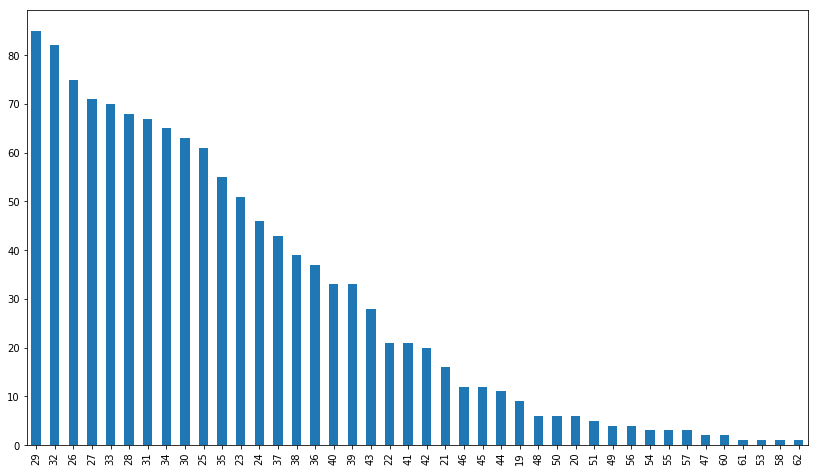

In [12]:
survey['Age'].value_counts().plot(kind='bar', figsize=(14,8));

In [13]:
survey.describe()

,Age
count,1242.000000
mean,32.097424
std,7.087187
min,19.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,62.000000


In [14]:
treat = survey[survey.treatment == 'Yes']
treat = survey[survey.treatment == 'No']

In [15]:
survey.treatment.value_counts()

Yes    628
No     614
Name: treatment, dtype: int64

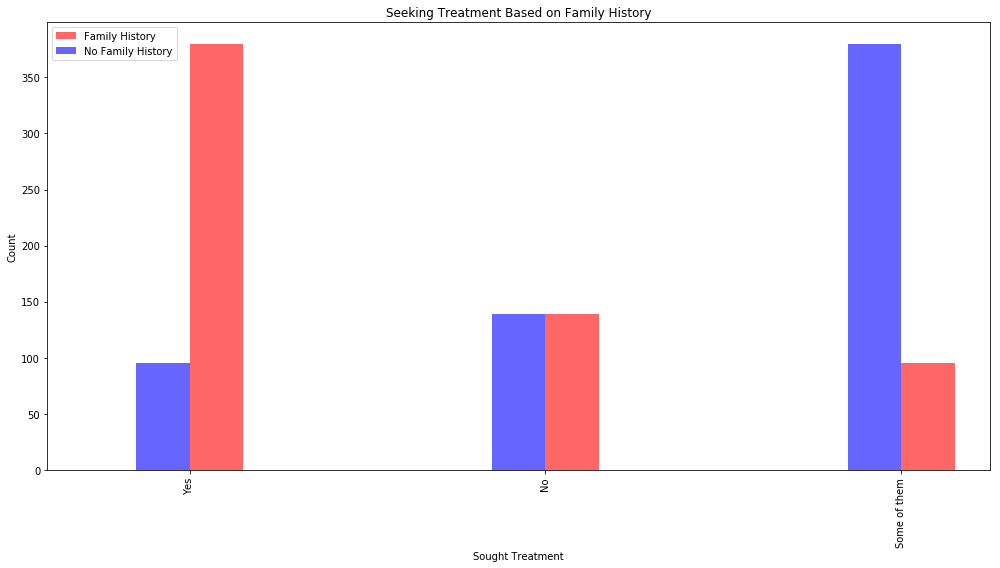

In [16]:
ax = treat['coworkers'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Family History', width=0.15, position = 0, color = 'red')
ax = treat['coworkers'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'blue', label = 'No Family History', width= 0.15, position = 1, title='Seeking Treatment Based on Family History')
ax.set_xlabel("Sought Treatment")
ax.set_ylabel("Count")
plt.tight_layout()
plt.legend();

In [17]:
fam_history_pos = survey[survey.family_history == 'Yes']
fam_history_neg = survey[survey.family_history == 'No']

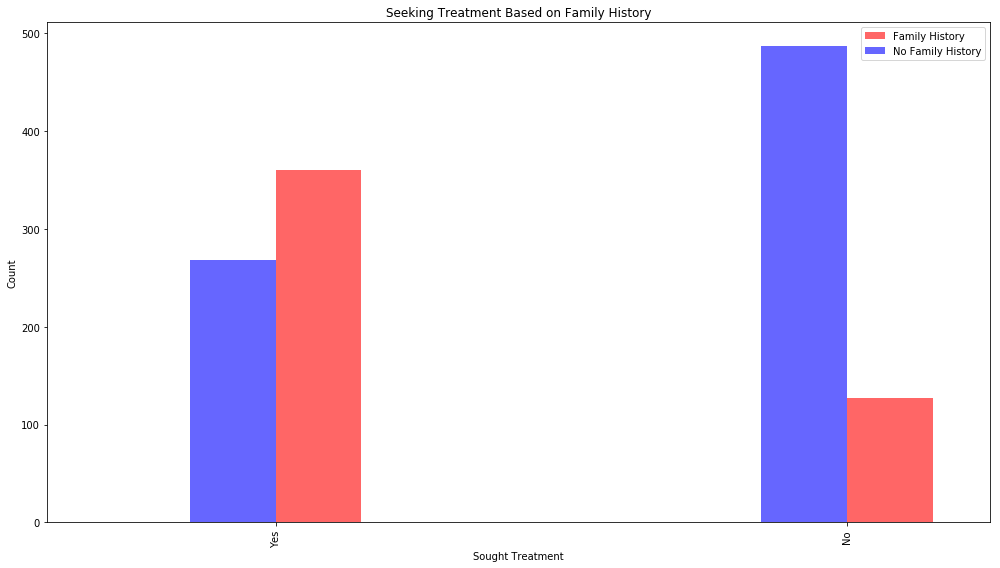

In [18]:
ax = fam_history_pos['treatment'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Family History', width=0.15, position = 0, color = 'red')
ax = fam_history_neg['treatment'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'blue', label = 'No Family History', width= 0.15, position = 1, title='Seeking Treatment Based on Family History')
ax.set_xlabel("Sought Treatment")
ax.set_ylabel("Count")
plt.tight_layout()
plt.legend();

We can see from this graph, it seems that people with family history of mental health are a lot more likely to seek out treatment compared to those who have never had a family history.

<h3>Amount of male,female and trans who try to seek help<h3>

In [19]:
survey['Gender'].value_counts()

Male                                              608
male                                              202
Female                                            119
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Cis Male                                            2
Female                                              2
Female (trans)                                      2
Man                                                 2
Cis Man                                             1
Neuter                                              1
Genderqueer                                         1
Nah                         

In [20]:
male = ['Male ', 'male', 'male ', 'M', 'm', 'make', 'man', 'cis man', 'malr', 'mail', 'mal', 'Make', 'Male', 'Cis Male', 'Cis Man', 'Male (CIS)', 'male (cis)', 'Mal', 'ostensibly male, unsure what that really means', 'cis male', 'Malr', 'maile', 'msle', 'Mail', 'Man']
female = ['Female', 'female', 'female ', 'femake', 'cis female', 'F', 'f',
          'Woman', 'Female ', 'cis-female/femme', 'Femake', 'Cis Female',
          'femail', 'woman', 'Female (cis)', 'female (cis)']
trans_other = ['Nah','non-binary','Male-ish','trans-female','queer',
               'Guy (-ish) ^_^','enby','Androgyne','neuter','queer/she/they',
               'nah','Agender','Genderqueer','male leaning androgynous','fluid',
               'trans woman','Female (trans)',"Trans-female", 
               "something kinda male?", "queer/she/they", "non-binary","nah", 
               "all", "Enby", "fluid", "genderqueer", "Androgyne", "agender", 
               "male leaning androgynous", "guy (-ish) ^_^", "Trans woman",
               "Neuter", "female (trans)", "queer", 
               "ostensibly male, unsure what that really means"] 
survey.Gender = survey.Gender.replace(male, 'male')
survey.Gender = survey.Gender.replace(female, 'female')
survey.Gender = survey.Gender.replace(trans_other, 'trans/other')
survey['Gender'].value_counts()

male           980
female         245
trans/other     17
Name: Gender, dtype: int64

Between male and female participants who is most likely to be concerned about their mental health, and why(maybe comments can help us)?


In [21]:
male = survey[survey.Gender == 'male']
female = survey[survey.Gender == 'female']
trans = survey[survey.Gender == 'trans/other']

In [22]:
male['seek_help'].value_counts()

No            510
Don't know    283
Yes           187
Name: seek_help, dtype: int64

In [23]:
female['seek_help'].value_counts()

No            115
Don't know     74
Yes            56
Name: seek_help, dtype: int64

In [24]:
trans['seek_help'].value_counts()

No            12
Yes            3
Don't know     2
Name: seek_help, dtype: int64

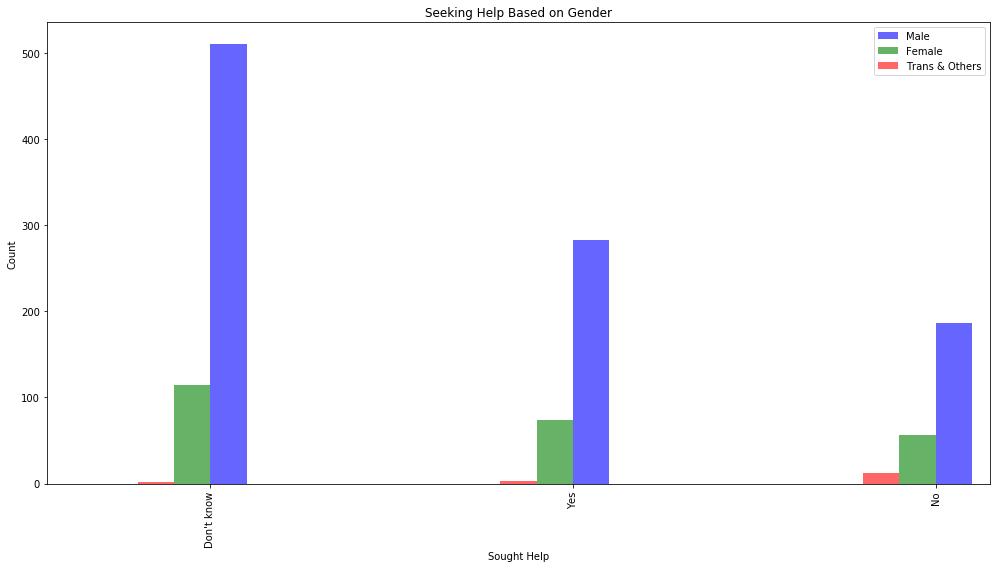

In [25]:
ax = male['seek_help'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Male', width=0.1, position = 0, color = 'blue')
ax = female['seek_help'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Female', width=0.1, position = 1, color = 'green');
ax = trans['seek_help'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'red', label = 'Trans & Others', width= 0.1, position = 2, title='Seeking Help Based on Gender')

ax.set_xlabel("Sought Help")
ax.set_ylabel("Count")
plt.tight_layout()
plt.legend();

<h3>Taking treatment because of work_interfere<h3>

In [26]:
survey['work_interfere'].value_counts()

Sometimes    462
Never        210
Rarely       172
Often        139
Name: work_interfere, dtype: int64

In [27]:
survey.treatment.value_counts()

Yes    628
No     614
Name: treatment, dtype: int64

In [28]:
Sometimes=survey[survey.work_interfere == 'Sometimes']
Never=survey[survey.work_interfere == 'Never']
Rarely=survey[survey.work_interfere == 'Rarely']
Often=survey[survey.work_interfere == 'Often']

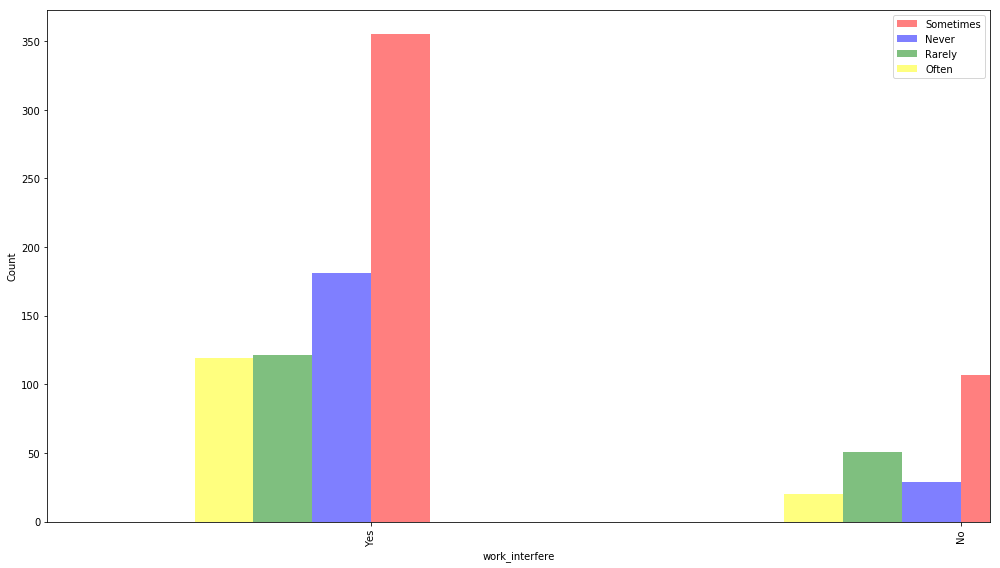

In [29]:
ax = Sometimes['treatment'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.5, label = 'Sometimes', width=0.1, position = 0, color = 'red')
ax = Never['treatment'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.5, color = 'blue', label = 'Never', width= 0.1, position = 1)
ax = Rarely['treatment'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.5, color = 'green', label = 'Rarely', width= 0.1, position = 2)
ax = Often['treatment'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.5, color = 'yellow', label = 'Often', width= 0.1, position = 3)
ax.set_xlabel("work_interfere")
ax.set_ylabel("Count")
plt.tight_layout()
plt.legend();

In [ ]:
#features_correlation = survey.corr()
#plt.figure(figsize=(8,8))
#sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
#plt.show()

<h3>Creating A Copy Dataframe<h3>

In [30]:
main_dataframe = survey

<h3>Encoding and building a model<h3>

In [31]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []
for feature in main_dataframe:
    if feature in intFeatures:
        main_dataframe[feature] = main_dataframe[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        main_dataframe[feature] = main_dataframe[feature].fillna(defaultString)
    elif feature in floatFeatures:
        main_dataframe[feature] = main_dataframe[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
        
        
feature_cols = ['Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere','treatment']




from sklearn.preprocessing import LabelEncoder
labelDict = {}
for feature in feature_cols:
    le = LabelEncoder()
    le.fit(main_dataframe[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    main_dataframe[feature] = le.transform(main_dataframe[feature])
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():     
    print(key, value)
    
main_dataframe = main_dataframe[feature_cols]    
main_dataframe.head()

label_Gender ['female', 'male', 'trans/other']
label_family_history ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_work_interfere ['NaN', 'Never', 'Often', 'Rarely', 'Sometimes']
label_treatment ['No', 'Yes']


,Gender,family_history,benefits,care_options,anonymity,leave,work_interfere,treatment
0,0,0,2,1,2,2,2,1
1,1,0,0,0,0,0,3,0
2,1,0,1,0,0,1,3,0
3,1,1,1,2,1,1,2,1
4,1,0,2,0,0,0,1,0


<h3>Splitting the Data<h3>

In [32]:
from sklearn.model_selection import train_test_split

X = main_dataframe.loc[:, main_dataframe.columns != 'treatment']
y = main_dataframe.treatment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

<h3>Scoring models Function<h3>

In [51]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize

def evalClassModel(model, y_test, y_pred_class, plot=True):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    
    model.fit(X_train,y_train)
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('========First 10 predicted responses:========\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('========First 10 predicted probabilities of class members:========\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('========First 10 predicted probabilities:========\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

<h3>Finding the best hyperparameter<h3>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier


def finding_the_best_fit(model,X,y, param_dist):
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)
featuresSize = feature_cols.__len__()
    

<h3>DecisionTree Classifier<h3>

In [44]:
param_dist_decision = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
model_decision = DecisionTreeClassifier()
finding_the_best_fit(model_decision,X,y, param_dist)

Rand. Best Score:  0.8301127214170693
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}


D:\Anconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change 

[0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.808, 0.83, 0.83, 0.83, 0.824, 0.83, 0.825, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83]


D:\Anconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 0.8418230563002681
Null accuracy:
 0    191
1    182
Name: treatment, dtype: int64
Percentage of ones: 0.4879356568364611
Percentage of zeros: 0.5120643431635389
True: [1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1]
Pred: [1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1]


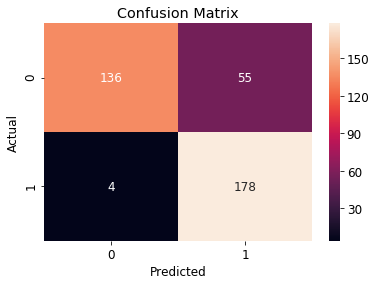

Classification Accuracy: 0.8418230563002681
Classification Error: 0.1581769436997319
False Positive Rate: 0.2879581151832461
Precision: 0.7639484978540773
AUC Score: 0.8450319314193661
Cross-validated AUC: 0.8815873855270999
First 10 predicted responses:
 [1 1 0 0 1 0 1 0 1 0]
First 10 predicted probabilities of class members:
 [[0.18666667 0.81333333]
 [0.18888889 0.81111111]
 [0.97959184 0.02040816]
 [0.97959184 0.02040816]
 [0.18666667 0.81333333]
 [0.85123967 0.14876033]
 [0.40718563 0.59281437]
 [0.69230769 0.30769231]
 [0.40718563 0.59281437]
 [0.85123967 0.14876033]]
First 10 predicted probabilities:
 [[0.81333333]
 [0.81111111]
 [0.02040816]
 [0.02040816]
 [0.81333333]
 [0.14876033]
 [0.59281437]
 [0.30769231]
 [0.59281437]
 [0.14876033]]


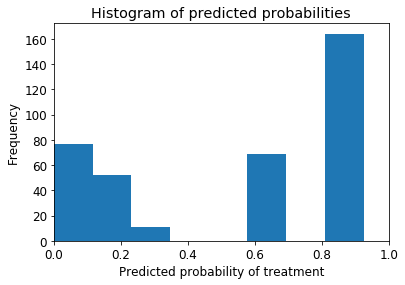

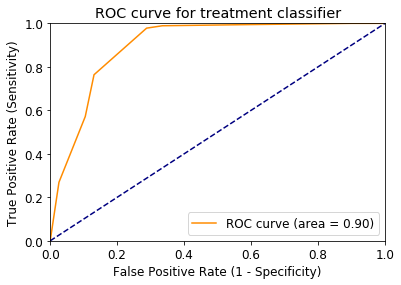

[[136  55]
 [  4 178]]


0.8418230563002681

In [48]:
model_1 = DecisionTreeClassifier(criterion='entropy', max_depth= 3, max_features=6, min_samples_leaf= 7, min_samples_split=8)
model_1.fit(X_train,y_train)
y_predict = model_1.predict(X_test)
evalClassModel(model_1,y_test,y_predict)

<h3>Random Forest<h3>

In [46]:
from sklearn.ensemble import RandomForestClassifier

param_dist_forest = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
model_forest = RandomForestClassifier(n_estimators = 20)
finding_the_best_fit(model_forest,X,y, param_dist_forest)

Rand. Best Score:  0.8301127214170693
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[0.83, 0.834, 0.837, 0.83, 0.832, 0.83, 0.83, 0.83, 0.83, 0.832, 0.832, 0.83, 0.83, 0.833, 0.831, 0.831, 0.834, 0.831, 0.83, 0.833]


Accuracy: 0.8418230563002681
Null accuracy:
 0    191
1    182
Name: treatment, dtype: int64
Percentage of ones: 0.4879356568364611
Percentage of zeros: 0.5120643431635389
True: [1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1]
Pred: [1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1]


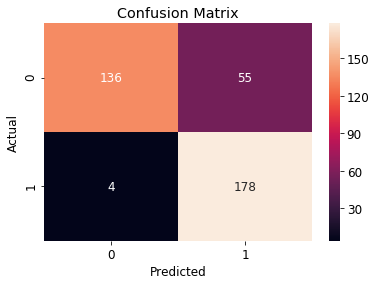

Classification Accuracy: 0.8418230563002681
Classification Error: 0.1581769436997319
False Positive Rate: 0.2879581151832461
Precision: 0.7639484978540773
AUC Score: 0.8450319314193661
Cross-validated AUC: 0.8874453342063073
First 10 predicted responses:
 [1 1 0 0 1 0 1 0 1 0]
First 10 predicted probabilities of class members:
 [[0.17687075 0.82312925]
 [0.08805031 0.91194969]
 [0.97959184 0.02040816]
 [0.97959184 0.02040816]
 [0.2238806  0.7761194 ]
 [0.85123967 0.14876033]
 [0.40718563 0.59281437]
 [0.69230769 0.30769231]
 [0.40718563 0.59281437]
 [0.85123967 0.14876033]]
First 10 predicted probabilities:
 [[0.82312925]
 [0.91194969]
 [0.02040816]
 [0.02040816]
 [0.7761194 ]
 [0.14876033]
 [0.59281437]
 [0.30769231]
 [0.59281437]
 [0.14876033]]


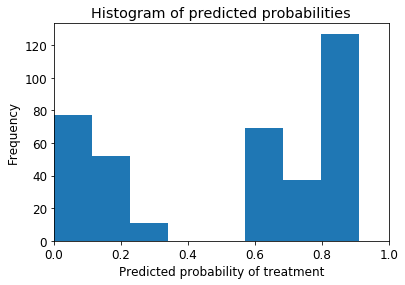

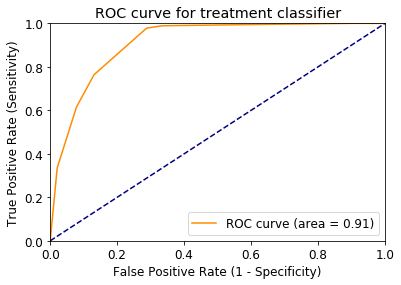

[[136  55]
 [  4 178]]


0.8418230563002681

In [47]:
model_2 = DecisionTreeClassifier(criterion='entropy', max_depth= 3, max_features=6, min_samples_leaf= 7, min_samples_split=8)
model_2.fit(X_train,y_train)
y_predict = model_2.predict(X_test)
evalClassModel(model_2,y_test,y_predict)

<h3>Navie Bayes<h3>

Accuracy: 0.7613941018766756
Null accuracy:
 0    191
1    182
Name: treatment, dtype: int64
Percentage of ones: 0.4879356568364611
Percentage of zeros: 0.5120643431635389
True: [1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1]
Pred: [1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1]


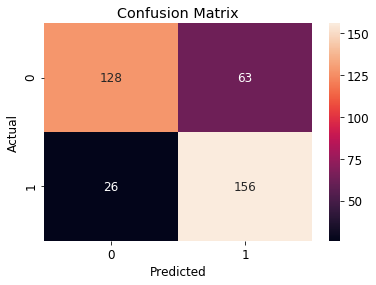

Classification Accuracy: 0.7613941018766756
Classification Error: 0.23860589812332444
False Positive Rate: 0.3298429319371728
Precision: 0.7123287671232876
AUC Score: 0.7636499626028422
Cross-validated AUC: 0.795378904249872
========First 10 predicted responses:========
 [1 1 1 0 1 0 0 0 1 0]
========First 10 predicted probabilities of class members:========
 [[0.26194599 0.73805401]
 [0.38625284 0.61374716]
 [0.4787487  0.5212513 ]
 [0.80738945 0.19261055]
 [0.44802135 0.55197865]
 [0.5752429  0.4247571 ]
 [0.51121882 0.48878118]
 [0.59102717 0.40897283]
 [0.45593397 0.54406603]
 [0.85011544 0.14988456]]
========First 10 predicted probabilities:========
 [[0.73805401]
 [0.61374716]
 [0.5212513 ]
 [0.19261055]
 [0.55197865]
 [0.4247571 ]
 [0.48878118]
 [0.40897283]
 [0.54406603]
 [0.14988456]]


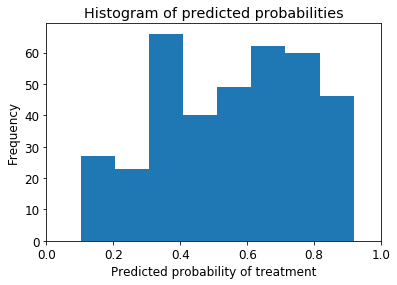

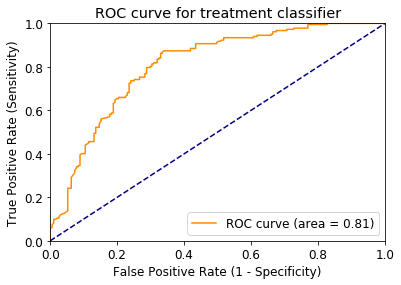

[[128  63]
 [ 26 156]]


0.7613941018766756

In [52]:
from sklearn.naive_bayes import MultinomialNB
model_3 = MultinomialNB()
model_3.fit(X_train,y_train)
y_predict = model_3.predict(X_test)
evalClassModel(model_3,y_test,y_predict)